<a href="https://colab.research.google.com/github/CodeGurl20/CodeGurl20/blob/main/Fatal_Force_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 57.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [5]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [7]:
print(f'df_hh_income duplicated: {df_hh_income.duplicated().values.any()}')
print(f'df_pct_poverty duplicated: {df_pct_poverty.duplicated().values.any()}')
print(f'df_pct_completed_hs duplicated: {df_pct_completed_hs.duplicated().values.any()}')
print(f'df_share_race_city duplicated: {df_share_race_city.duplicated().values.any()}')
print(f'df_fatalities duplicated: {df_fatalities.duplicated().values.any()}')

df_hh_income duplicated: False
df_pct_poverty duplicated: False
df_pct_completed_hs duplicated: False
df_share_race_city duplicated: False
df_fatalities duplicated: False


In [8]:
print(f'df_hh_income is null: {df_hh_income.isnull().values.any()}')
print(f'df_pct_poverty is null: {df_pct_poverty.isnull().values.any()}')
print(f'df_pct_completed_hs is null: {df_pct_completed_hs.isnull().values.any()}')
print(f'df_share_race_city is null: {df_share_race_city.isnull().values.any()}')
print(f'df_fatalities is null: {df_fatalities.isnull().values.any()}')

df_hh_income is null: True
df_pct_poverty is null: False
df_pct_completed_hs is null: False
df_share_race_city is null: False
df_fatalities is null: True


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [9]:
df_fatalities['age'].isna().values.any()

True

In [10]:
df_hh_income['Median Income'] = df_hh_income['Median Income'].fillna(0)
df_fatalities.fillna(0)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [11]:
df_pct_poverty = df_pct_poverty[df_pct_poverty['poverty_rate'] !=  '-']

In [12]:
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].astype(float)

In [13]:
df_pct_poverty_mean = df_pct_poverty.groupby(
    by=['Geographic Area'],
    as_index=False
).agg({'poverty_rate': 'mean'})

In [14]:
df_pct_poverty_mean.set_index('Geographic Area', inplace=True)

In [15]:
df_pct_poverty_mean.sort_values(
    by=['poverty_rate'],
    inplace=True
)
df_pct_poverty_mean.head()

,poverty_rate
Geographic Area,
NJ,8.19
CT,9.14
MA,9.59
WY,9.89
MD,10.31


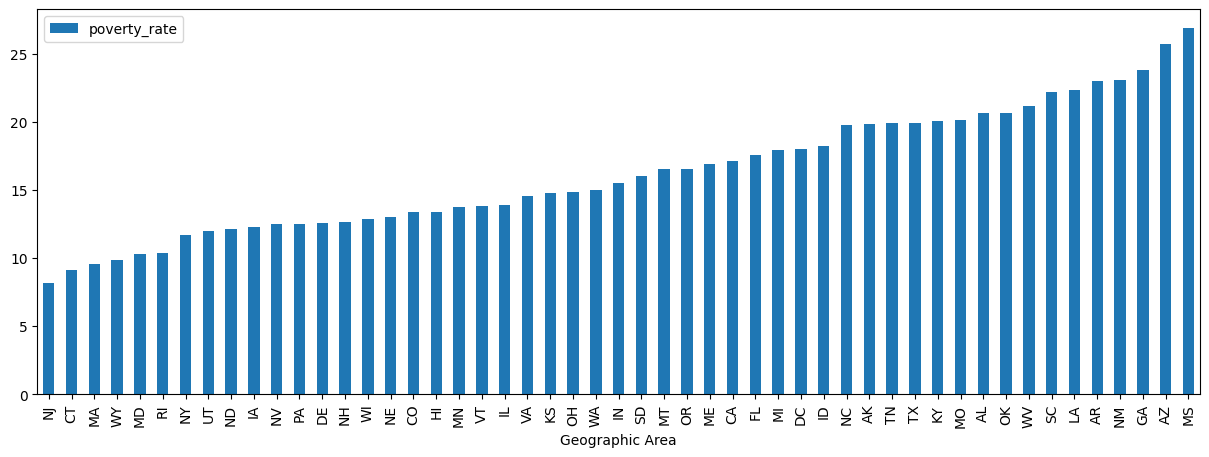

In [16]:
fig = df_pct_poverty_mean.plot.bar(
    y=['poverty_rate'],
    rot=90,
    figsize=(15,5)
)

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [17]:
df_pct_completed_hs = df_pct_completed_hs[df_pct_completed_hs['percent_completed_hs'] != '-']

In [18]:
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].astype(float)

In [19]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29132 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29132 non-null  object 
 1   City                  29132 non-null  object 
 2   percent_completed_hs  29132 non-null  float64
dtypes: float64(1), object(2)
memory usage: 910.4+ KB


In [20]:
df_pct_completed_hs_mean = df_pct_completed_hs.groupby(
    by=['Geographic Area'],
    as_index=False
).agg({'percent_completed_hs': 'mean'})

In [21]:
df_pct_completed_hs_mean.set_index('Geographic Area', inplace=True)

In [22]:
df_pct_completed_hs_mean.sort_values(by=['percent_completed_hs'], inplace=True)

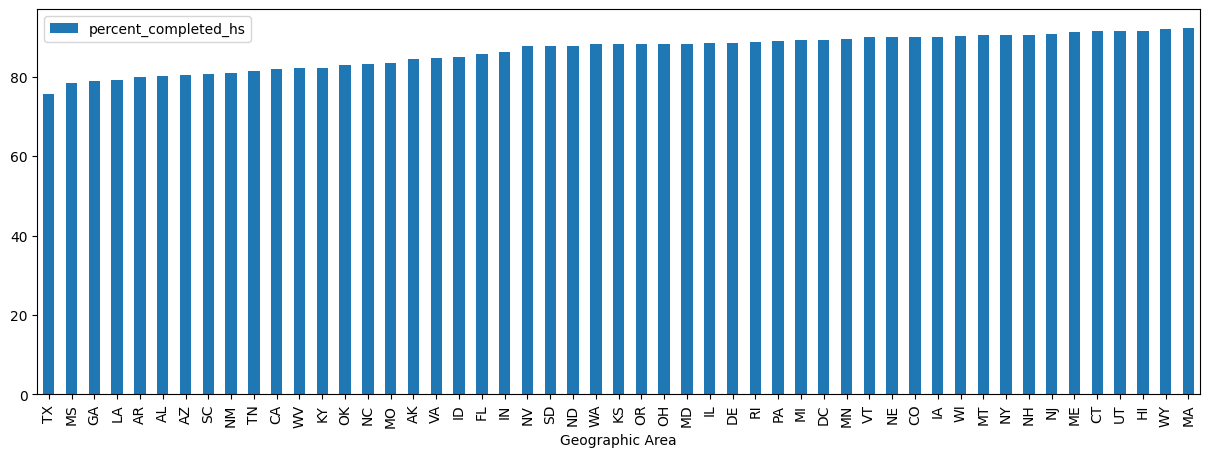

In [23]:
fig = df_pct_completed_hs_mean.plot.bar(
    y=['percent_completed_hs'],
    rot=90,
    figsize=(15, 5)
)

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [24]:
merge_df = pd.merge(
    df_pct_poverty_mean,
    df_pct_completed_hs_mean,
    on=['Geographic Area'],
    how='outer'
)

<Axes: xlabel='Geographic Area'>

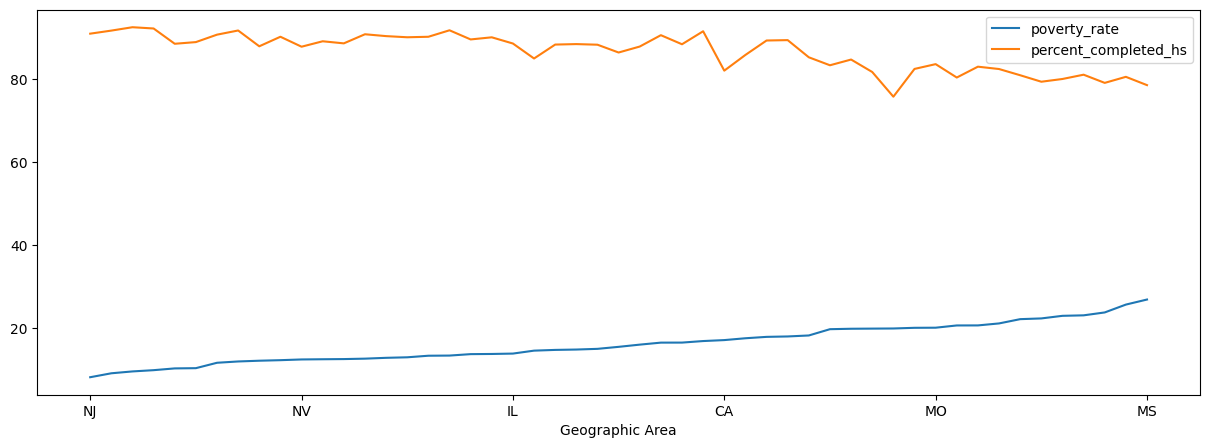

In [25]:
merge_df.plot.line(
    figsize=(15,5)
)

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [26]:
merge_df.head()

,poverty_rate,percent_completed_hs
Geographic Area,,
NJ,8.19,90.85
CT,9.14,91.59
MA,9.59,92.40
WY,9.89,92.10
MD,10.31,88.42


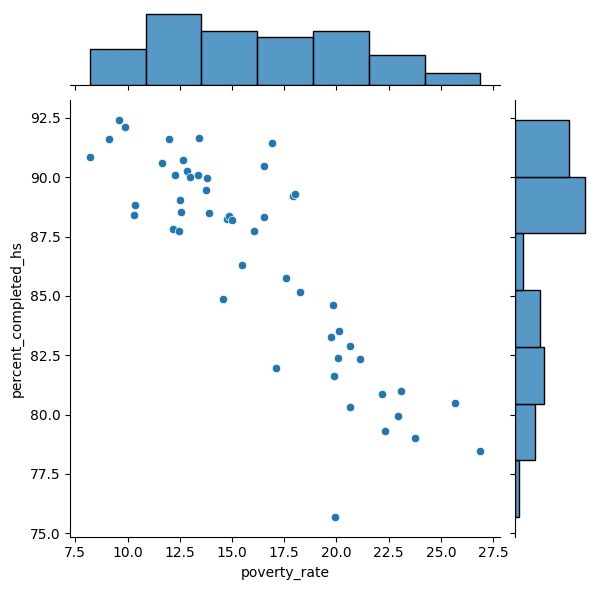

In [27]:
sns.jointplot(
    data=merge_df,
    x='poverty_rate',
    y='percent_completed_hs'
)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

<Axes: xlabel='poverty_rate', ylabel='percent_completed_hs'>

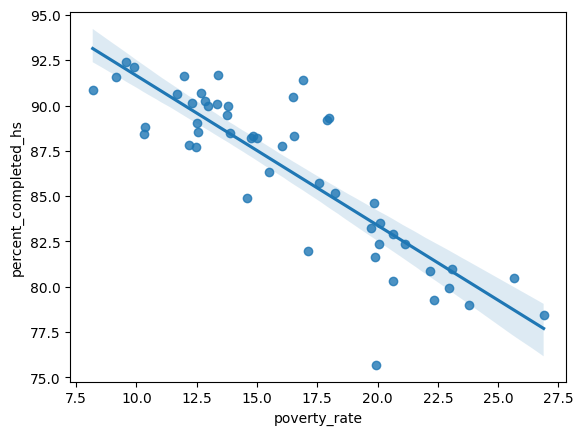

In [28]:
sns.regplot(
    data=merge_df,
    x='poverty_rate',
    y='percent_completed_hs'
)

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [29]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [45]:
df_fatalities.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False


In [46]:
df_fatalities.dropna(inplace=True)

In [47]:
df_fatalities['age'] = df_fatalities['age'].astype(int)

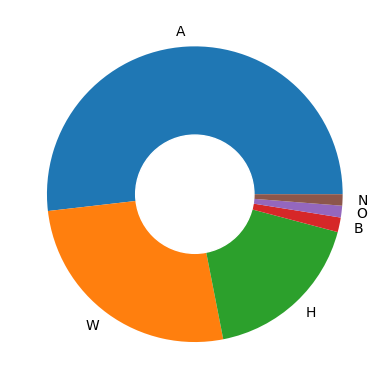

In [48]:
plt.pie(
    df_fatalities['race'].value_counts(),
    labels=df_fatalities['race'].unique()
)
my_circle=plt.Circle(
    (0,0),
    0.4,
    color='white'
)
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

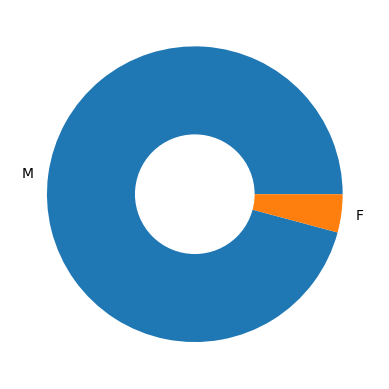

In [49]:
plt.pie(
    df_fatalities['gender'].value_counts(),
    labels=df_fatalities['gender'].unique()
)
my_circle=plt.Circle(
    (0,0),
    0.4,
    color='white'
)
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [50]:
# difference bettween men and women in the manner_of_death
diff_data = df_fatalities[['manner_of_death', 'gender']].value_counts()

In [51]:
diff_data

,,count
manner_of_death,gender,
shot,M,2011
shot and Tasered,M,149
shot,F,89
shot and Tasered,F,5


In [52]:
diff_data_man = df_fatalities[df_fatalities['gender'] == 'M']['manner_of_death'].value_counts()
diff_data_wom = df_fatalities[df_fatalities['gender'] == 'F']['manner_of_death'].value_counts()

In [54]:
type(diff_data_man)

pandas.core.series.Series

In [55]:
diff_merge = pd.DataFrame(diff_data_man)

In [56]:
diff_merge['F'] = diff_data_wom

In [57]:
diff_merge.rename(columns={'count': 'M'}, inplace=True)

<Axes: xlabel='manner_of_death'>

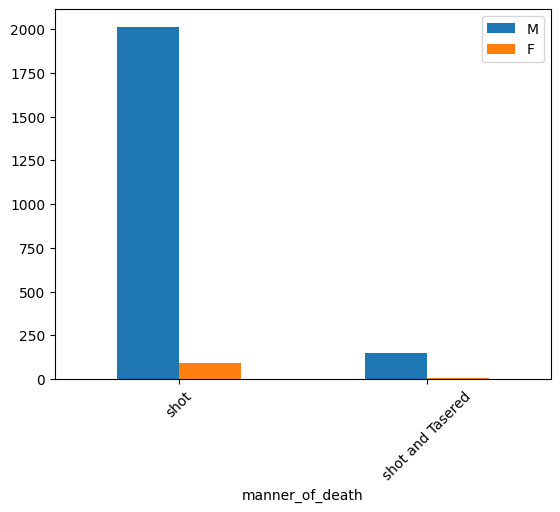

In [58]:
diff_merge.plot.bar(
    rot=45
)

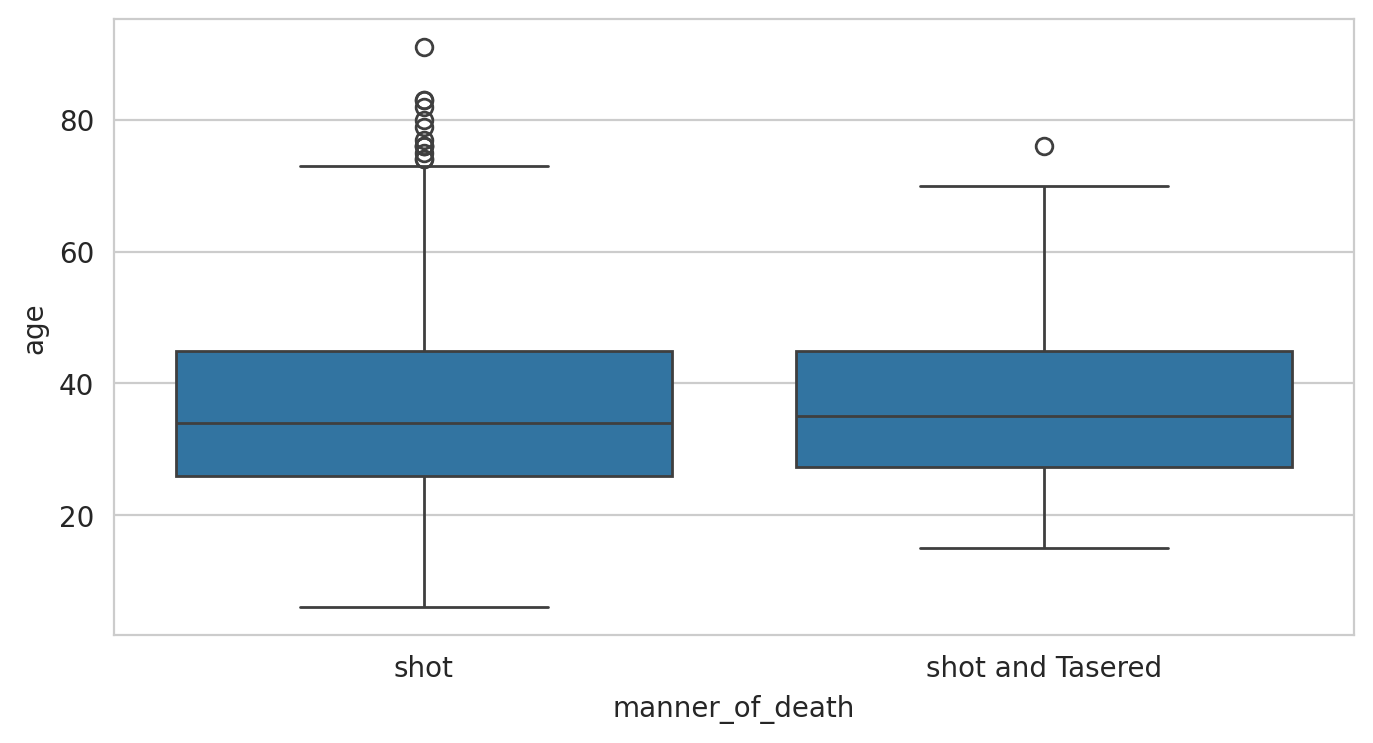

In [59]:
# age and manner of death
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
    sns.boxplot(
        data=df_fatalities,
        x='manner_of_death',
        y='age'
    )

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [60]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False


In [61]:
pie = df_fatalities['armed'].value_counts()

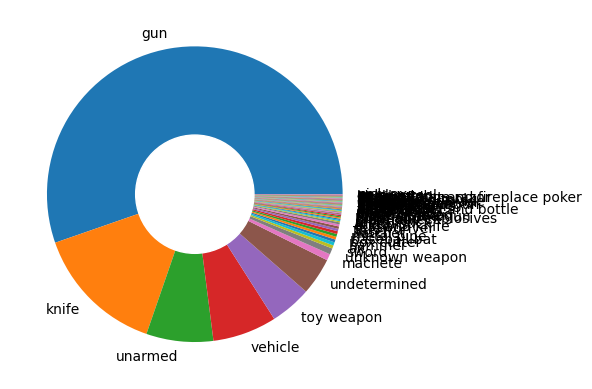

In [62]:
plt.pie(
    pie,
    labels=pie.index
)

my_circle = plt.Circle(
    (0,0),
    0.4,
    color='white'
)

p = plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [63]:
under_25 = (len(df_fatalities[df_fatalities['age'] < 25]) * 100)/len(df_fatalities)
print(f'People killed under 25: {under_25 :0.2f} %' )

People killed under 25: 18.72 %


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

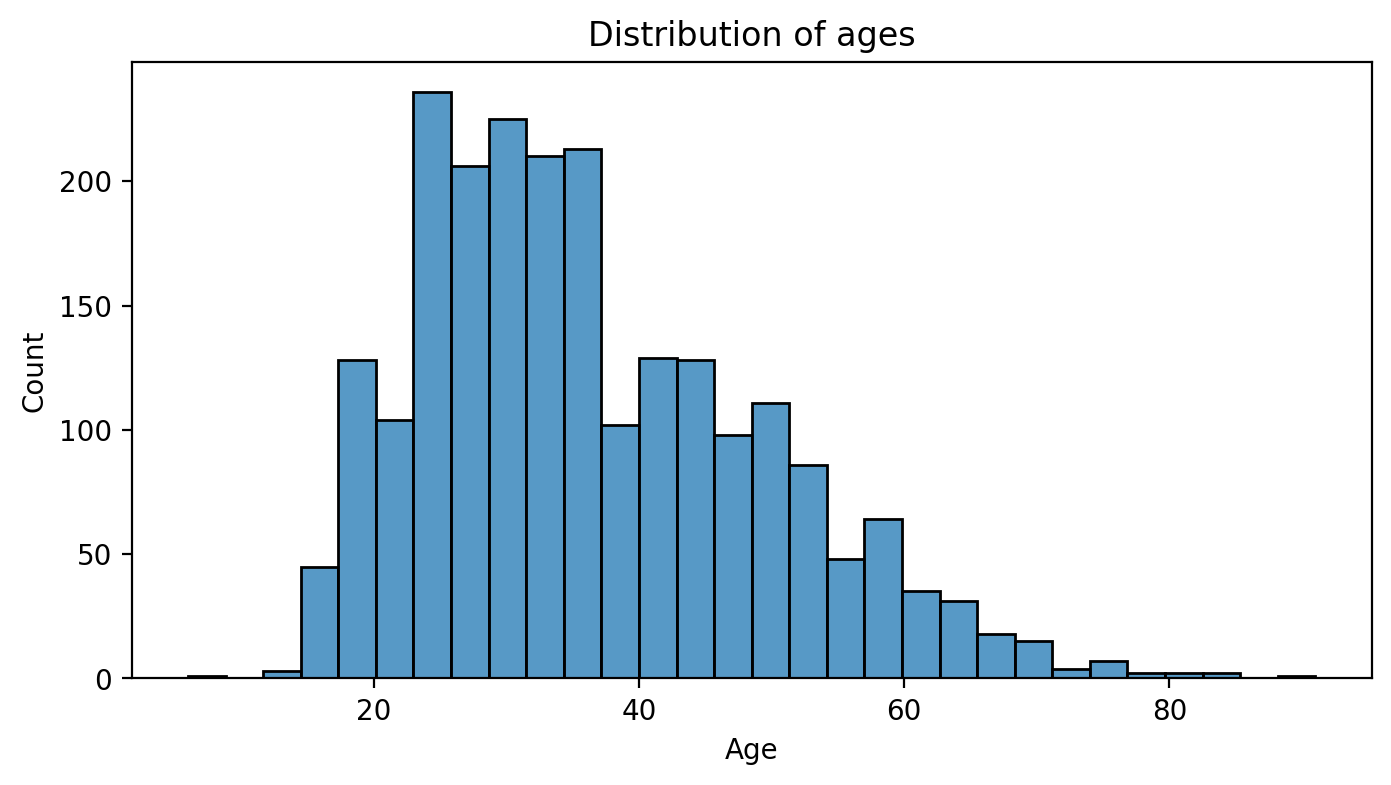

In [66]:
plt.figure(
    figsize=(8,4),
    dpi=200
)

sns.histplot(
    data=df_fatalities,
    x=df_fatalities['age'],
    bins=30
)

plt.xlabel('Age')
plt.title('Distribution of ages')
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

In [67]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False


In [68]:
df_fatalities[['age', 'race']].value_counts()

age  race
36   W       52
25   B       40
45   W       39
26   W       38
30   W       37
             ..
37   N        1
     A        1
36   O        1
35   N        1
91   W        1
Name: count, Length: 242, dtype: int64

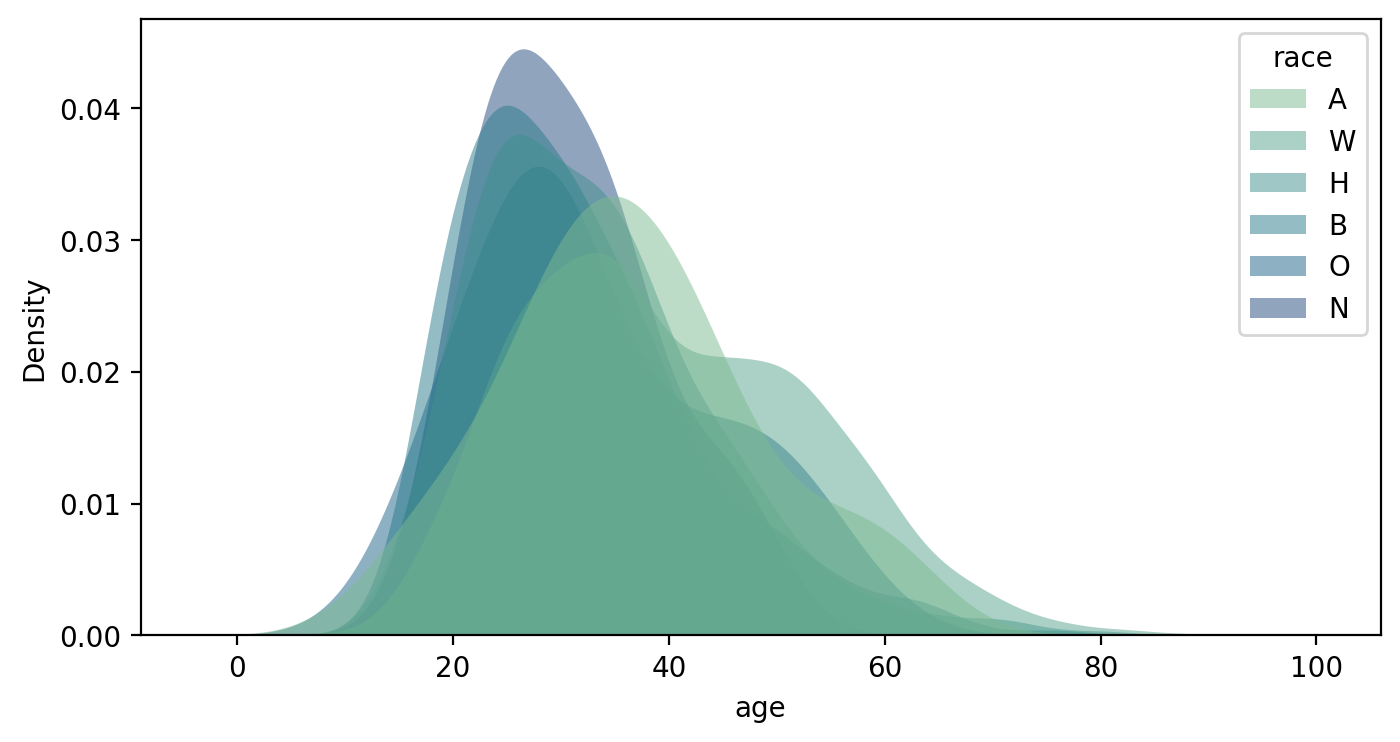

In [69]:
plt.figure(
    figsize=(8,4),
    dpi=200
)

sns.kdeplot(
    data=df_fatalities,
    fill=True,
    common_norm=False,
    palette='crest',
    alpha=.5,
    linewidth=0,
    hue='race',
    x='age'
)

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [70]:
total_kill_by_race = df_fatalities['race'].value_counts()

<Axes: xlabel='race'>

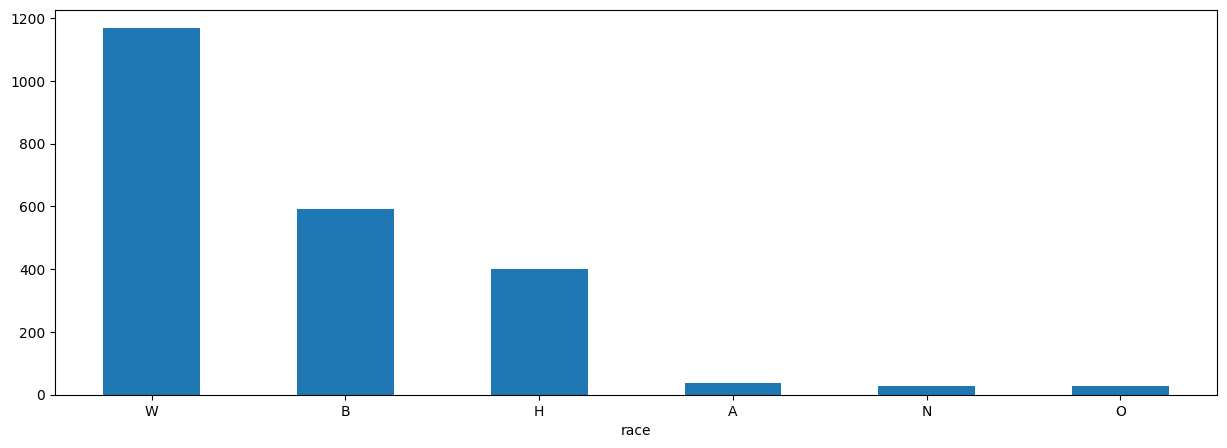

In [71]:
total_kill_by_race.plot.bar(
    rot=0,
    figsize=(15,5)
)

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [72]:
result = 100 * len(df_fatalities[df_fatalities['signs_of_mental_illness'] == True])/len(df_fatalities)
print(f'People diagnosed with a mental illness was: {result : 0.2f} %')

People diagnosed with a mental illness was:  25.42 %


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [73]:
result_city = df_fatalities['city'].value_counts()
result_city = result_city[:10]
result_city

,count
city,
Los Angeles,35
Phoenix,28
Houston,24
Chicago,22
Austin,18
Las Vegas,17
Columbus,16
Miami,15
San Antonio,15


<Axes: title={'center': 'top 10 most dangerouse cities'}, xlabel='city'>

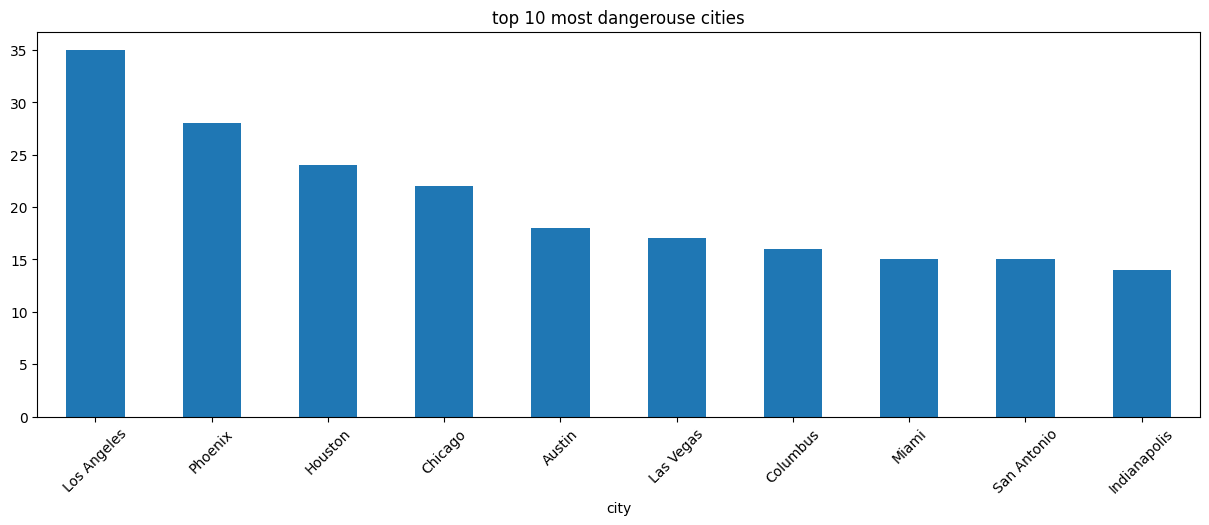

In [74]:
result_city.plot.bar(
    rot=45,
     title='top 10 most dangerouse cities',
     figsize=(15,5)
)

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [75]:
top10_city = df_fatalities[df_fatalities['city'].isin(result_city.index)]

In [76]:
result_top10 = top10_city.groupby(
    by=['city', 'race'],
    as_index=False
).agg(
    {'id': 'count'}
)

In [77]:
result_top10.head()

,city,race,id
0,Austin,B,3
1,Austin,H,2
2,Austin,W,13
3,Chicago,B,19
4,Chicago,H,1


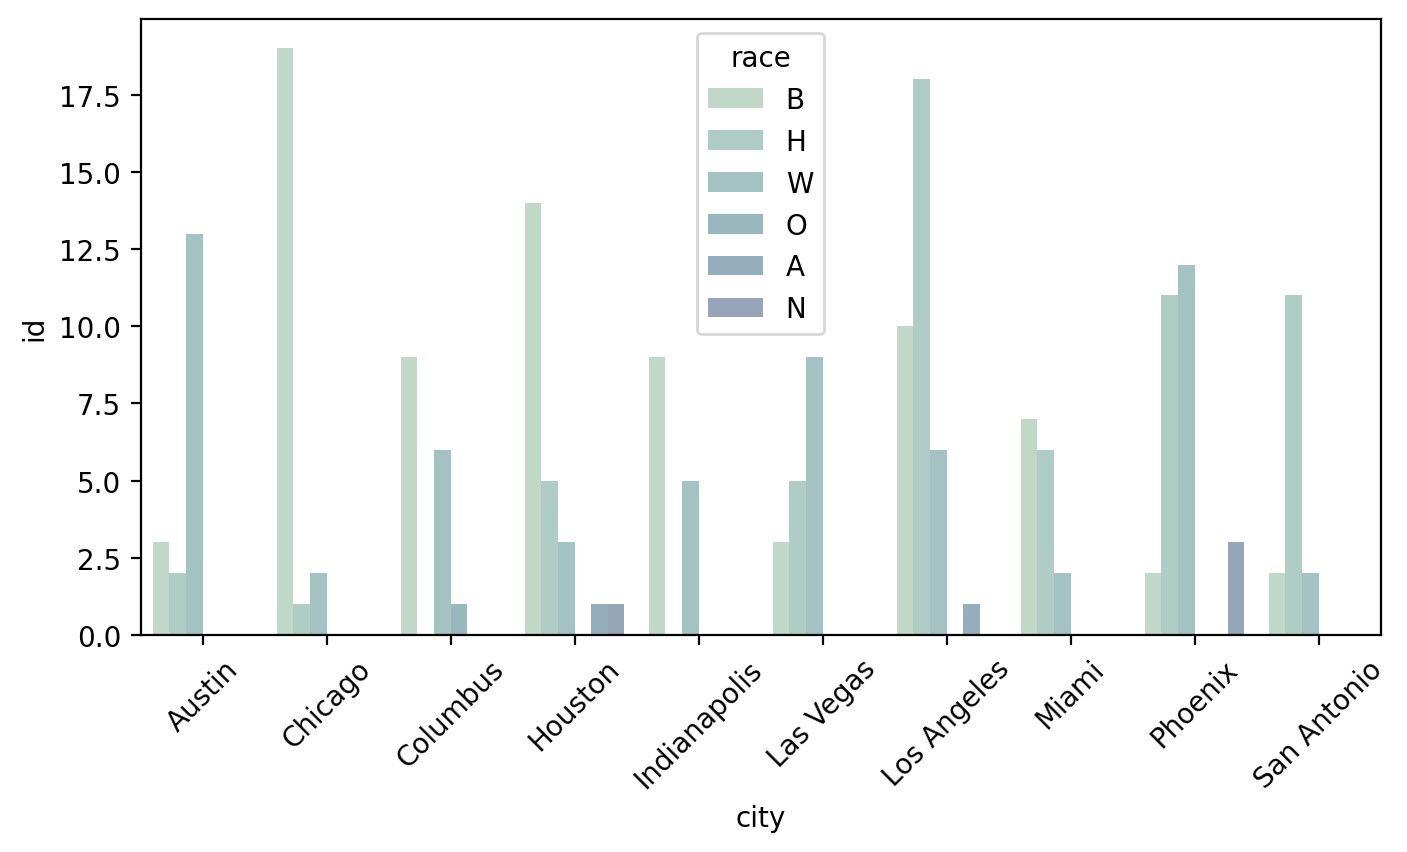

In [79]:
plt.figure(
    figsize=(8,4),
    dpi=200
)

sns.barplot(
    data=result_top10,
    fill=True,
    palette='crest',
    alpha=.5,
    linewidth=0,
    hue='race',
    x='city',
    y='id'
)

plt.xticks(rotation=45)

plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [80]:
top10_state = df_fatalities['state'].value_counts()

<Axes: xlabel='state'>

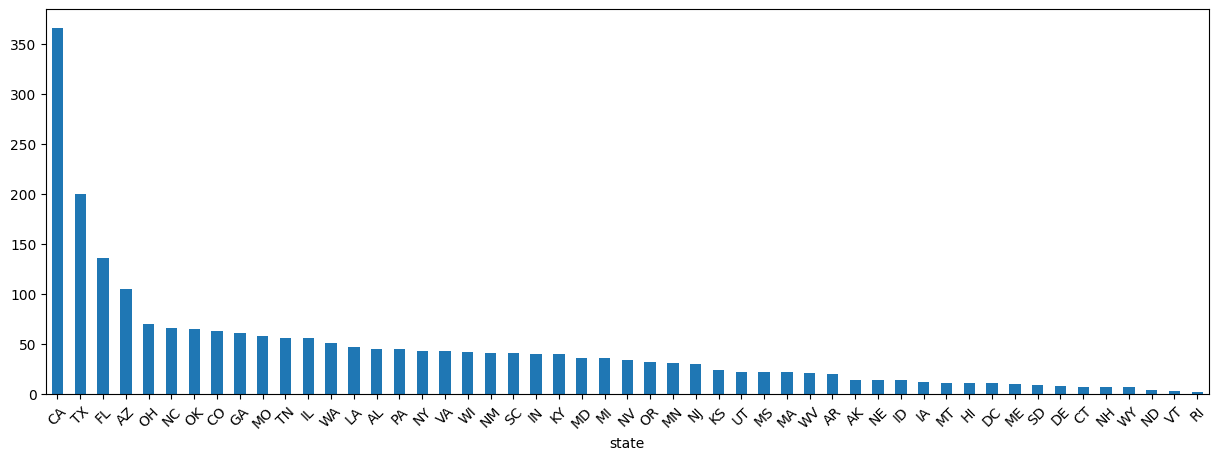

In [81]:
top10_state.plot.bar(
    rot=45,
    figsize=(15,5)
)

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [82]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False


In [83]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

<ipython-input-83-ea1695318982>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])


In [84]:
result = df_fatalities['date'].value_counts()
result.sort_index(inplace=True)
result.head()

,count
date,
2015-01-03,3
2015-01-04,2
2015-01-06,1
2015-01-07,2
2015-01-08,1


In [85]:
gb = result.groupby(
    [(result.index.year),
    (result.index.month)]
).count()

<Axes: xlabel='date,date'>

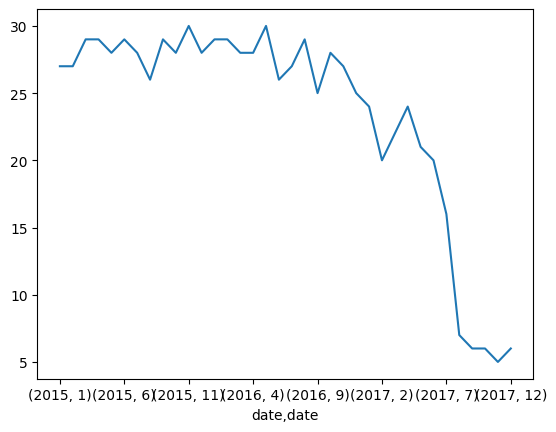

In [86]:
gb.plot.line()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).